# project objective


### -> to study and predit surging price of cabs which depends on multiple features using mechine learning algorithms

### import the packages

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import re
import matplotlib.pyplot as plt

### read the data set

In [ ]:
df = pd.read_csv('cab_rides.csv')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 693071 entries, 0 to 693070
Data columns (total 10 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   distance          693071 non-null  float64
 1   cab_type          693071 non-null  object 
 2   time_stamp        693071 non-null  int64  
 3   destination       693071 non-null  object 
 4   source            693071 non-null  object 
 5   price             637976 non-null  float64
 6   surge_multiplier  693071 non-null  float64
 7   id                693071 non-null  object 
 8   product_id        693071 non-null  object 
 9   name              693071 non-null  object 
dtypes: float64(3), int64(1), object(6)
memory usage: 52.9+ MB


In [ ]:
# drop the row where price is nan
df.dropna(subset=['price'] , inplace=True)
df.reset_index(inplace=True)

In [ ]:
# cretating columns for data time hour from time stamp column

In [ ]:
import datetime
#convert 13digit time stamp to datetime format
df['date_time']= pd.to_datetime(df['time_stamp']/1000, unit='s')
df['date']= df['date_time'].dt.date
df['day'] = df.date_time.dt.dayofweek
df['hour'] = df.date_time.dt.hour

In [ ]:
# as we can see distance is in object data type
print(df['distance'].unique())
# converting the km to miles for furture calculation
for i in range(0,len(df)):
    print(i)
    if type(df['distance'][i]) == str:
        num_list = df['distance'][i].split(" ")
        df['distance'][i] = float(num_list[0]) / 1.609344

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 637976 entries, 0 to 637975
Data columns (total 15 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   index             637976 non-null  int64         
 1   distance          637976 non-null  float64       
 2   cab_type          637976 non-null  object        
 3   time_stamp        637976 non-null  int64         
 4   destination       637976 non-null  object        
 5   source            637976 non-null  object        
 6   price             637976 non-null  float64       
 7   surge_multiplier  637976 non-null  float64       
 8   id                637976 non-null  object        
 9   product_id        637976 non-null  object        
 10  name              637976 non-null  object        
 11  date_time         637976 non-null  datetime64[ns]
 12  date              637976 non-null  object        
 13  day               637976 non-null  int64         
 14  hour

In [ ]:
#extract hours only
df['fare_per_mile']= round(df.price/df.distance,2)




## spliting the data frames for further web scrapping


### marge the data frames 

In [ ]:
# reading the data freames
df_1 = pd.read_csv('data_first_part.csv')
df_2 = pd.read_csv('data_second_part_1.csv')
df_3 = pd.read_csv('data_second_part_2.csv')
df_4 = pd.read_csv('data_second_part_3.csv')
df_5 = pd.read_csv('data_third_part_1.csv')
df_6 = pd.read_csv('data_third_part_2.csv')
df_7 = pd.read_csv('data_third_part_3.csv')

In [ ]:
df_1.drop(['Unnamed: 0.13', 'Unnamed: 0.12', 'Unnamed: 0.11', 'Unnamed: 0.10',
       'Unnamed: 0.9', 'Unnamed: 0.8', 'Unnamed: 0.7', 'Unnamed: 0.6',
       'Unnamed: 0.5', 'Unnamed: 0.4', 'Unnamed: 0.3', 'Unnamed: 0.2',
       'Unnamed: 0.1', 'Unnamed: 0'],axis=1,inplace=True)

In [ ]:
df_2.drop(['Unnamed: 0.10', 'Unnamed: 0.9', 'Unnamed: 0.8', 'Unnamed: 0.7',
       'Unnamed: 0.6', 'Unnamed: 0.5', 'Unnamed: 0.4', 'Unnamed: 0.3',
       'Unnamed: 0.2', 'Unnamed: 0.1', 'index', 'Unnamed: 0'],axis=1,inplace=True)

In [ ]:
df_3.drop(['Unnamed: 0.10', 'Unnamed: 0.9', 'Unnamed: 0.8', 'Unnamed: 0.7',
       'Unnamed: 0.6', 'Unnamed: 0.5', 'Unnamed: 0.4', 'Unnamed: 0.3',
       'Unnamed: 0.2', 'Unnamed: 0.1', 'index', 'Unnamed: 0'],axis=1,inplace=True)

In [ ]:
df_4.drop(['Unnamed: 0.10', 'Unnamed: 0.9', 'Unnamed: 0.8', 'Unnamed: 0.7',
       'Unnamed: 0.6', 'Unnamed: 0.5', 'Unnamed: 0.4', 'Unnamed: 0.3',
       'Unnamed: 0.2', 'Unnamed: 0.1', 'index', 'Unnamed: 0'],axis=1,inplace=True)

In [ ]:
df_5.drop(['Unnamed: 0.6', 'Unnamed: 0', 'Unnamed: 0.1', 'Unnamed: 0.1.1',
       'Unnamed: 0.1.1.1', 'Unnamed: 0.5', 'Unnamed: 0.4', 'Unnamed: 0.3',
       'Unnamed: 0.2', 'Unnamed: 0.1.1.1.1', 'index', 'Unnamed: 0.1.1.1.1.1'],axis=1,inplace=True)

In [ ]:
df_6.drop(['Unnamed: 0.6', 'Unnamed: 0', 'Unnamed: 0.1', 'Unnamed: 0.1.1',
       'Unnamed: 0.1.1.1', 'Unnamed: 0.1.1.1.1', 'Unnamed: 0.5',
       'Unnamed: 0.4', 'Unnamed: 0.3', 'Unnamed: 0.2', 'Unnamed: 0.1.1.1.1.1',
       'index', 'Unnamed: 0.1.1.1.1.1.1'],axis=1,inplace=True)

In [ ]:
df_7.drop(['Unnamed: 0.5', 'Unnamed: 0', 'Unnamed: 0.1', 'Unnamed: 0.1.1',
       'Unnamed: 0.1.1.1', 'Unnamed: 0.1.1.1.1', 'Unnamed: 0.1.1.1.1.1',
       'Unnamed: 0.1.1.1.1.1.1', 'Unnamed: 0.1.1.1.1.1.1.1',
       'Unnamed: 0.1.1.1.1.1.1.1.1', 'Unnamed: 0.4', 'Unnamed: 0.3',
       'Unnamed: 0.2', 'Unnamed: 0.1.1.1.1.1.1.1.1.1',
       'Unnamed: 0.1.1.1.1.1.1.1.1.1.1', 'index'],axis=1,inplace=True)

In [ ]:
print(f"df_1 shape = {df_1.shape}")
print(f"df_2 shape = {df_2.shape}")
print(f"df_3 shape = {df_3.shape}")
print(f"df_4 shape = {df_4.shape}")
print(f"df_5 shape = {df_5.shape}")
print(f"df_6 shape = {df_6.shape}")
print(f"df_7 shape = {df_7.shape}")

In [ ]:
# concat the data frames
frames = [df_1 , df_2 , df_3 , df_4 , df_5 , df_6 , df_7]

In [ ]:
df_marged = pd.concat(frames).reset_index()

In [ ]:
# drop the rows where traveling time is nan
df_marged.dropna(subset=['traveling_time'] , inplace=True)
print(df_marged.shape)

(57927, 19)


In [ ]:
df_marged.isna().sum()

index               0
distance            0
cab_type            0
time_stamp          0
destination         0
source              0
price               0
surge_multiplier    0
id                  0
product_id          0
name                0
date_time           0
date                0
day                 0
hour                0
fare_per_mile       0
class_hour          0
new_price           0
traveling_time      0
dtype: int64

In [ ]:
df_marged.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 57927 entries, 0 to 156311
Data columns (total 19 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   index             57927 non-null  int64  
 1   distance          57927 non-null  float64
 2   cab_type          57927 non-null  object 
 3   time_stamp        57927 non-null  int64  
 4   destination       57927 non-null  object 
 5   source            57927 non-null  object 
 6   price             57927 non-null  float64
 7   surge_multiplier  57927 non-null  float64
 8   id                57927 non-null  object 
 9   product_id        57927 non-null  object 
 10  name              57927 non-null  object 
 11  date_time         57927 non-null  object 
 12  date              57927 non-null  object 
 13  day               57927 non-null  int64  
 14  hour              57927 non-null  int64  
 15  fare_per_mile     57927 non-null  float64
 16  class_hour        57927 non-null  int64

In [ ]:
# creating 3 colunms for traveling time

df_marged['max_travel_time'] = np.nan
df_marged['min_travel_time'] = np.nan
df_marged['avg_travel_time'] = np.nan
 

In [ ]:
# add min travelling time to min travel time clounm
# add max travelling time to max travel time clounm
# add avg of min and max travelling time to avg travel time clounm


In [ ]:
df_marged.reset_index(inplace=True)

In [ ]:
import re
for i in range(0,len(df_marged)):
    print(i)
    temp = re.findall(r'\d+', df_marged['traveling_time'][i])
    res = list(map(int, temp))
    if len(res) == 1:
        res.insert(0 , res[0])
    df_marged["max_travel_time"][i] = res[1]
    df_marged["min_travel_time"][i] = res[0]
    df_marged["avg_travel_time"][i] = ((res[0] + res[1])/2)
        
  

In [ ]:
df_marged.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 57927 entries, 0 to 57926
Data columns (total 23 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   level_0           57927 non-null  int64  
 1   index             57927 non-null  int64  
 2   distance          57927 non-null  float64
 3   cab_type          57927 non-null  object 
 4   time_stamp        57927 non-null  int64  
 5   destination       57927 non-null  object 
 6   source            57927 non-null  object 
 7   price             57927 non-null  float64
 8   surge_multiplier  57927 non-null  float64
 9   id                57927 non-null  object 
 10  product_id        57927 non-null  object 
 11  name              57927 non-null  object 
 12  date_time         57927 non-null  object 
 13  date              57927 non-null  object 
 14  day               57927 non-null  int64  
 15  hour              57927 non-null  int64  
 16  fare_per_mile     57927 non-null  float6

In [ ]:
# now read the weather data
df_weather=pd.read_csv('weather.csv')

In [ ]:
# replace the nan values to 0 in rain colunm
df_weather['rain'].fillna(0, inplace = True)

In [ ]:
df_marged['source']

In [ ]:
df_marged

,level_0,index,distance,cab_type,time_stamp,destination,source,price,surge_multiplier,id,...,date,day,hour,fare_per_mile,class_hour,new_price,traveling_time,max_travel_time,min_travel_time,avg_travel_time
0,0,0,0.44,Lyft,1544952607890,"North+Station,+Boston,+MA,+USA",Haymarket Square,5.0,1.0,424553bb-7174-41ea-aeb4-fe06d4f4b9d7,...,2018-12-16,6,9,11.36,3,5.250,2–6 min,6.0,2.0,4.0
1,1,1,0.44,Lyft,1543284023677,"North+Station,+Boston,+MA,+USA",Haymarket Square,11.0,1.0,4bd23055-6827-41c6-b23b-3c491f24e74d,...,2018-11-27,1,2,25.00,0,11.000,3 min,3.0,3.0,3.0
2,2,2,0.44,Lyft,1543366822198,"North+Station,+Boston,+MA,+USA",Haymarket Square,7.0,1.0,981a3613-77af-4620-a42a-0c0866077d1e,...,2018-11-28,2,1,15.91,0,7.000,3 min,3.0,3.0,3.0
3,3,3,0.44,Lyft,1543553582749,"North+Station,+Boston,+MA,+USA",Haymarket Square,26.0,1.0,c2d88af2-d278-4bfd-a8d0-29ca77cc5512,...,2018-11-30,4,4,59.09,1,26.000,3 min,3.0,3.0,3.0
4,4,4,0.44,Lyft,1543463360223,"North+Station,+Boston,+MA,+USA",Haymarket Square,9.0,1.0,e0126e1f-8ca9-4f2e-82b3-50505a09db9a,...,2018-11-29,3,3,20.45,1,9.000,3 min,3.0,3.0,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
57922,57922,13379,2.66,Uber,1543447721249,"Theatre+District,+Boston,+MA,+USA",Fenway,29.5,1.0,33da1154-aaa2-4dda-b23f-17148ce894e9,...,2018-11-28,2,23,11.09,7,33.040,9 至 18 分鐘,18.0,9.0,13.5
57923,57923,13380,2.66,Uber,1543447721249,"Theatre+District,+Boston,+MA,+USA",Fenway,9.5,1.0,5cc6bac4-1dee-4cde-bbc0-b1ea64a475fd,...,2018-11-28,2,23,3.57,7,10.925,9 至 18 分鐘,18.0,9.0,13.5
57924,57924,13381,2.66,Uber,1543447721249,"Theatre+District,+Boston,+MA,+USA",Fenway,15.0,1.0,cb5f7175-965b-4c88-965b-acc3444e8a1a,...,2018-11-28,2,23,5.64,7,16.500,9 至 18 分鐘,18.0,9.0,13.5
57925,57925,13382,2.66,Uber,1544766003828,"Theatre+District,+Boston,+MA,+USA",Fenway,20.5,1.0,d1a32342-7aa7-4f1a-a189-66566c466ffe,...,2018-12-14,4,5,7.71,1,20.500,9 至 14 分鐘,14.0,9.0,11.5


In [ ]:
df_marged.to_csv('final_0.csv')

In [ ]:
# for web scraping we have changed the scource column so change it back to murge the data

In [ ]:
for i in range(len(df_marged)):
    print(i)
    list1=df_marged['source'][i].split(",")
    if "+" in list1[0]:
        df_marged['source'][i]=list1[0].replace("+"," ")
    else:
        df_marged['source'][i] = list1[0]  

In [ ]:
df_marged

,level_0,index,distance,cab_type,time_stamp,destination,source,price,surge_multiplier,id,...,date,day,hour,fare_per_mile,class_hour,new_price,traveling_time,max_travel_time,min_travel_time,avg_travel_time
0,0,0,0.44,Lyft,1544952607890,"North+Station,+Boston,+MA,+USA",Haymarket Square,5.0,1.0,424553bb-7174-41ea-aeb4-fe06d4f4b9d7,...,2018-12-16,6,9,11.36,3,5.250,2–6 min,6.0,2.0,4.0
1,1,1,0.44,Lyft,1543284023677,"North+Station,+Boston,+MA,+USA",Haymarket Square,11.0,1.0,4bd23055-6827-41c6-b23b-3c491f24e74d,...,2018-11-27,1,2,25.00,0,11.000,3 min,3.0,3.0,3.0
2,2,2,0.44,Lyft,1543366822198,"North+Station,+Boston,+MA,+USA",Haymarket Square,7.0,1.0,981a3613-77af-4620-a42a-0c0866077d1e,...,2018-11-28,2,1,15.91,0,7.000,3 min,3.0,3.0,3.0
3,3,3,0.44,Lyft,1543553582749,"North+Station,+Boston,+MA,+USA",Haymarket Square,26.0,1.0,c2d88af2-d278-4bfd-a8d0-29ca77cc5512,...,2018-11-30,4,4,59.09,1,26.000,3 min,3.0,3.0,3.0
4,4,4,0.44,Lyft,1543463360223,"North+Station,+Boston,+MA,+USA",Haymarket Square,9.0,1.0,e0126e1f-8ca9-4f2e-82b3-50505a09db9a,...,2018-11-29,3,3,20.45,1,9.000,3 min,3.0,3.0,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
57922,57922,13379,2.66,Uber,1543447721249,"Theatre+District,+Boston,+MA,+USA",Fenway,29.5,1.0,33da1154-aaa2-4dda-b23f-17148ce894e9,...,2018-11-28,2,23,11.09,7,33.040,9 至 18 分鐘,18.0,9.0,13.5
57923,57923,13380,2.66,Uber,1543447721249,"Theatre+District,+Boston,+MA,+USA",Fenway,9.5,1.0,5cc6bac4-1dee-4cde-bbc0-b1ea64a475fd,...,2018-11-28,2,23,3.57,7,10.925,9 至 18 分鐘,18.0,9.0,13.5
57924,57924,13381,2.66,Uber,1543447721249,"Theatre+District,+Boston,+MA,+USA",Fenway,15.0,1.0,cb5f7175-965b-4c88-965b-acc3444e8a1a,...,2018-11-28,2,23,5.64,7,16.500,9 至 18 分鐘,18.0,9.0,13.5
57925,57925,13382,2.66,Uber,1544766003828,"Theatre+District,+Boston,+MA,+USA",Fenway,20.5,1.0,d1a32342-7aa7-4f1a-a189-66566c466ffe,...,2018-12-14,4,5,7.71,1,20.500,9 至 14 分鐘,14.0,9.0,11.5


In [ ]:
#Splitting the time_stamp attribute in weather to two attributes which are time and data
df_weather['date_time'] = pd.to_datetime(df_weather['time_stamp'], unit='s')
del df_weather['time_stamp']

#df_weather['date_time']

In [ ]:
# run the time stamp conversion because 
# the data type of the date column changes from data to object
# to take that column as dat data_type convert it

In [ ]:
import datetime
#convert 13digit time stamp to datetime format
df_marged['date_time']= pd.to_datetime(df_marged['time_stamp']/1000, unit='s')
df_marged['date']= df_marged['date_time'].dt.date
df_marged['day'] = df_marged.date_time.dt.dayofweek
df_marged['hour'] = df_marged.date_time.dt.hour

In [ ]:
#merge the datasets to refelect same time for a location
df_marged['merge_date'] = df_marged.source.astype(str) +" - "+ df_marged.date_time.dt.date.astype("str") +" - "+ df_marged.date_time.dt.hour.astype("str")
df_weather['merge_date'] = df_weather.location.astype(str) +" - "+ df_weather.date_time.dt.date.astype("str") +" - "+ df_weather.date_time.dt.hour.astype("str")
print(df.head(2))
print(df_weather.head(2))

   index  Unnamed: 0 distance cab_type     time_stamp    destination  \
0      0           0     0.44     Lyft  1544952607890  North Station   
1      1           1     0.44     Lyft  1543284023677  North Station   

             source  price  surge_multiplier  \
0  Haymarket Square    5.0               1.0   
1  Haymarket Square   11.0               1.0   

                                     id    product_id    name  \
0  424553bb-7174-41ea-aeb4-fe06d4f4b9d7     lyft_line  Shared   
1  4bd23055-6827-41c6-b23b-3c491f24e74d  lyft_premier     Lux   

                      date_time        date  day  hour  
0 2018-12-16 09:30:07.890000128  2018-12-16    6     9  
1 2018-11-27 02:00:23.676999936  2018-11-27    1     2  
    temp     location  clouds  pressure    rain  humidity   wind  \
0  42.42     Back Bay     1.0   1012.14  0.1228      0.77  11.25   
1  42.43  Beacon Hill     1.0   1012.15  0.1846      0.76  11.32   

            date_time                     merge_date  
0 2018-12-1

In [ ]:
df_weather = df_weather.groupby(['merge_date']).mean()
df_weather.reset_index(inplace=True)
df_weather.head()

,merge_date,temp,clouds,pressure,rain,humidity,wind
0,Back Bay - 2018-11-26 - 10,40.695,0.995,1014.800,0.0000,0.940,1.895
1,Back Bay - 2018-11-26 - 11,40.185,0.955,1015.305,0.0000,0.940,2.260
2,Back Bay - 2018-11-26 - 12,40.315,0.920,1015.275,0.0000,0.935,2.940
3,Back Bay - 2018-11-26 - 13,41.950,0.910,1015.200,0.0031,0.910,3.545
4,Back Bay - 2018-11-26 - 14,42.765,0.905,1014.695,0.0044,0.910,2.960


In [ ]:
#Merging based on the date and location.
df_final = pd.merge(df_marged, df_weather, on='merge_date')
print(df_final.shape)

(57631, 30)


In [ ]:
df_final.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 57631 entries, 0 to 57630
Data columns (total 30 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   level_0           57631 non-null  int64         
 1   index             57631 non-null  int64         
 2   distance          57631 non-null  float64       
 3   cab_type          57631 non-null  object        
 4   time_stamp        57631 non-null  int64         
 5   destination       57631 non-null  object        
 6   source            57631 non-null  object        
 7   price             57631 non-null  float64       
 8   surge_multiplier  57631 non-null  float64       
 9   id                57631 non-null  object        
 10  product_id        57631 non-null  object        
 11  name              57631 non-null  object        
 12  date_time         57631 non-null  datetime64[ns]
 13  date              57631 non-null  object        
 14  day               5763

In [ ]:
df_final.to_csv("final_1.csv")

In [ ]:
# cheaking the outliers in the price col

C:\Users\Dell\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='new_price'>

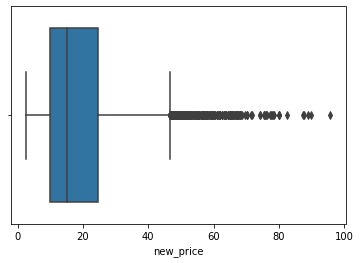

In [ ]:
sns.boxplot(df_final["new_price"])

(array([1.5785e+04, 1.9096e+04, 9.0290e+03, 9.1240e+03, 3.3280e+03,
        8.9100e+02, 2.5600e+02, 5.7000e+01, 4.4000e+01, 1.5000e+01]),
 array([ 2.5 , 10.25, 18.  , 25.75, 33.5 , 41.25, 49.  , 56.75, 64.5 ,
        72.25, 80.  ]),
 <BarContainer object of 10 artists>)

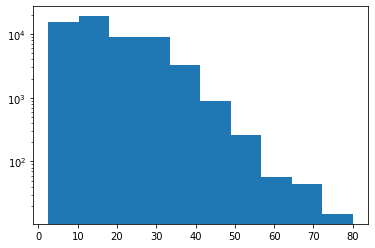

In [ ]:
plt.hist(df_final["new_price"],log=True)

In [ ]:
index_price = df_final[df_final['new_price'] > 80].index
df_final.drop(index_price , axis=0 , inplace=True)

In [ ]:
df_final.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 57625 entries, 0 to 57630
Data columns (total 30 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   level_0           57625 non-null  int64         
 1   index             57625 non-null  int64         
 2   distance          57625 non-null  float64       
 3   cab_type          57625 non-null  object        
 4   time_stamp        57625 non-null  int64         
 5   destination       57625 non-null  object        
 6   source            57625 non-null  object        
 7   price             57625 non-null  float64       
 8   surge_multiplier  57625 non-null  float64       
 9   id                57625 non-null  object        
 10  product_id        57625 non-null  object        
 11  name              57625 non-null  object        
 12  date_time         57625 non-null  datetime64[ns]
 13  date              57625 non-null  object        
 14  day               5762

In [ ]:
df_final['destination'].unique()

array(['North+Station,+Boston,+MA,+USA', 'Beacon+Hill,+Boston,+MA,+USA',
       'Back+Bay,+Boston,+MA,+USA', 'Theatre+District,+Boston,+MA,+USA',
       'Financial+District,+Boston,+MA,+USA', 'West+End,+Boston,+MA,+USA',
       'Northeastern+University,+Boston,+MA,+USA',
       'North+End,+Boston,+MA,+USA', 'South+Station,+Boston,+MA,+USA',
       'Fenway,+Boston,+MA,+USA', 'Boston+University,+Boston,+MA,+USA',
       'Haymarket+Square,+Boston,+MA,+USA'], dtype=object)

In [ ]:
df_final["source"].unique()

array(['Haymarket Square', 'Back Bay', 'North End', 'North Station',
       'Beacon Hill', 'Boston University', 'Fenway', 'South Station',
       'Theatre District', 'West End', 'Financial District',
       'Northeastern University'], dtype=object)

In [ ]:
df